This notebook shows a basic example of a mono-objective algorithm. For more examples we recommend looking at the pywinEA basics.ipynb notebook

In [1]:
# External dependencies
import numpy as np
from sklearn.naive_bayes import GaussianNB                         
from sklearn.model_selection import StratifiedKFold 
from sklearn.datasets import load_wine

# PyWin dependencies
from pywinEA.algorithm import GA
from pywinEA.visualization import Plotter, GAevaluator

In [2]:
dataset = load_wine()
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
# Add noisy variables
for n in range(40):
    dataset['feature_names'] = np.append(dataset['feature_names'], 'noisy_var_%d' % n)
    dataset['data'] = np.hstack(
        [dataset['data'], np.random.uniform(0, 10, size=dataset['data'].shape[0]).reshape(-1, 1)])
    
print('Num of features %d\nx_data shape %r' % (len(dataset['feature_names']), dataset['data'].shape))

Num of features 53
x_data shape (178, 53)


In [4]:
POPULATION_SIZE = 50
GENERATIONS = 200
FITNESS = GaussianNB()
CV = 5
ANNHILATION = 0.1
ELITISM = 0.2
MUTATION = 0.1

ga_basic = GA(
    population_size=POPULATION_SIZE, generations=GENERATIONS, cv=CV,
    fitness=FITNESS, annihilation=ANNHILATION, elitism=ELITISM, 
    mutation_rate=MUTATION, positive_class=1, id="BasicGA"
)

In [5]:
ga_basic.set_features(dataset['feature_names'])

In [6]:
ga_basic = ga_basic.fit(dataset['data'], dataset['target'])

 (BasicGA) Generations (form 0 to 200): 100%|██████████| 200/200 [00:59<00:00,  3.39it/s]


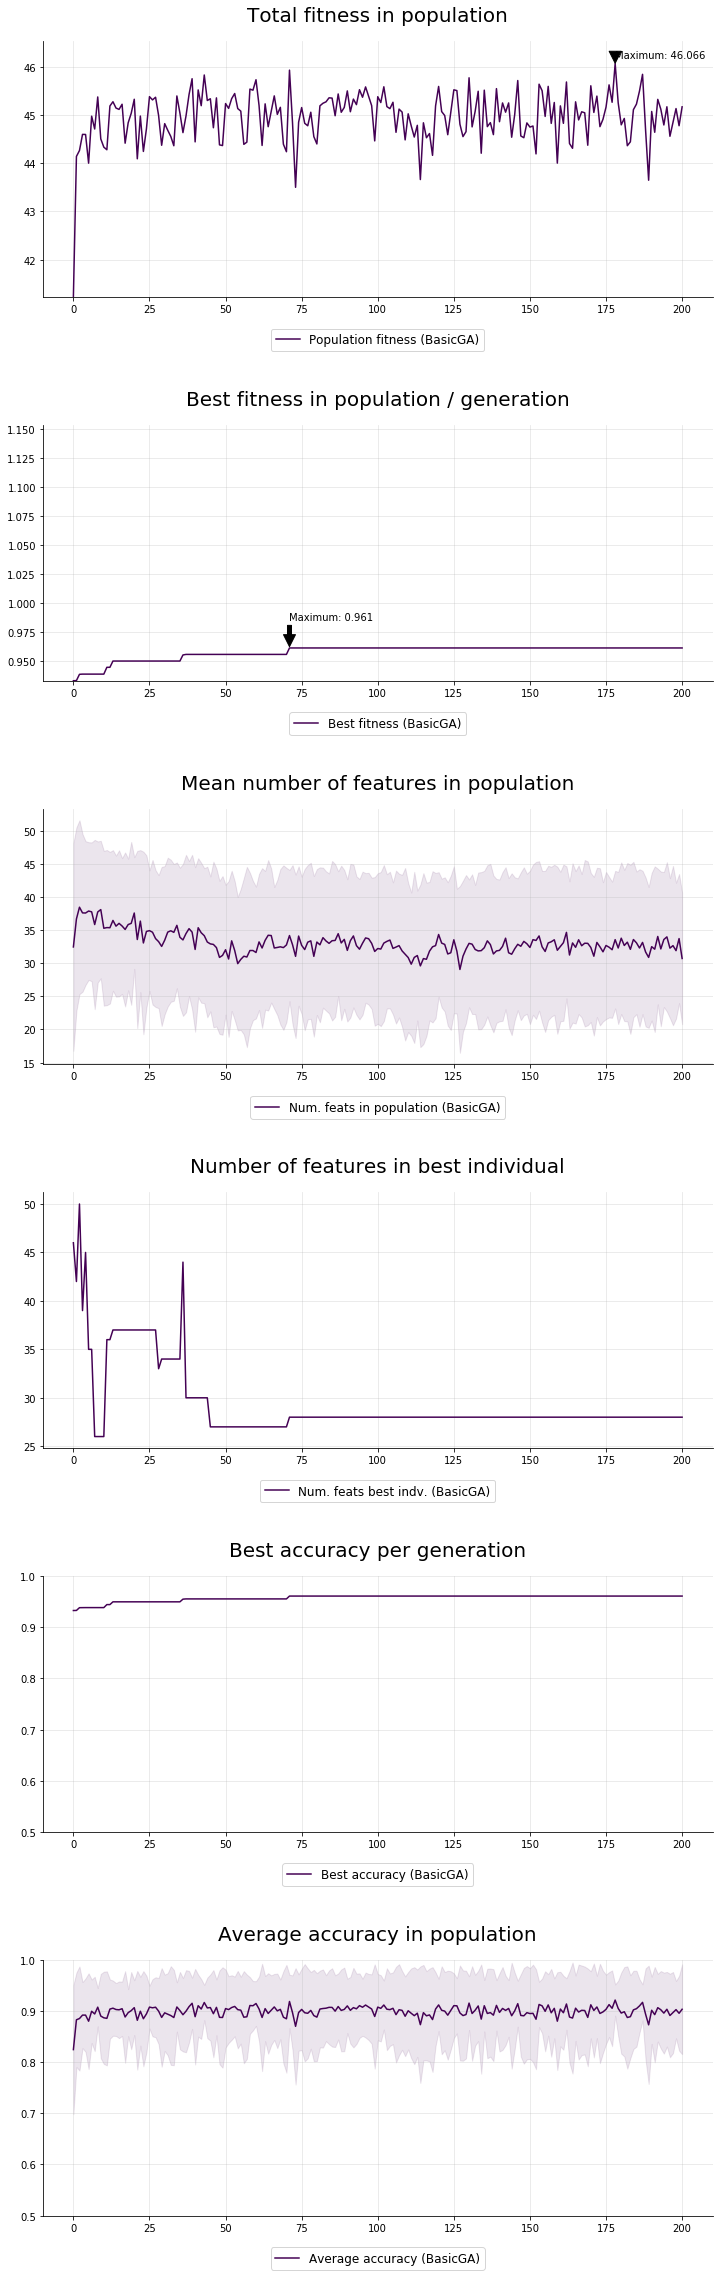

In [7]:
Plotter.plot_evolution(ga_basic)

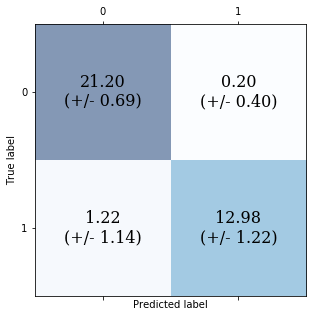

In [8]:
GAevaluator(ga_basic).test_confusion_matrix(cv=5, reps=10)